<a href="https://colab.research.google.com/github/shlokshukla200/ML-Logistic_Regression/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
#importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
%matplotlib inline

In [6]:
#Opening the csv

url= 'https://raw.githubusercontent.com/shlokshukla200/ML-Logistic_Regression/refs/heads/main/Weather_Australia.csv'

df=pd.read_csv(url)

In [7]:
#Shows first-5 rows of dataset

df.head(15)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,No
6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,...,49.0,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,No
7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,No
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,...,42.0,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,Yes
9,2008-12-10,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,...,58.0,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,No


In [8]:
#Shows information of data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [9]:
#Shows the statistical info

df.describe(include='all')

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
count,145460,145460,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135134,135197.000000,134894,...,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000,142199,142193
unique,3436,49,NaN,NaN,NaN,NaN,NaN,16,NaN,16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2
top,2017-06-24,Canberra,NaN,NaN,NaN,NaN,NaN,W,NaN,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,No
freq,49,3436,NaN,NaN,NaN,NaN,NaN,9915,NaN,11758,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,110319,110316
mean,NaN,NaN,12.194034,23.221348,2.360918,5.468232,7.611178,NaN,40.035230,NaN,...,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339,NaN,NaN
std,NaN,NaN,6.398495,7.119049,8.478060,4.193704,3.785483,NaN,13.607062,NaN,...,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665,NaN,NaN
min,NaN,NaN,-8.500000,-4.800000,0.000000,0.000000,0.000000,NaN,6.000000,NaN,...,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000,NaN,NaN
25%,NaN,NaN,7.600000,17.900000,0.000000,2.600000,4.800000,NaN,31.000000,NaN,...,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000,NaN,NaN
50%,NaN,NaN,12.000000,22.600000,0.000000,4.800000,8.400000,NaN,39.000000,NaN,...,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000,NaN,NaN
75%,NaN,NaN,16.900000,28.200000,0.800000,7.400000,10.600000,NaN,48.000000,NaN,...,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000,NaN,NaN


In [10]:
#Shows No. of Null value

df.isnull().sum()

,0
Date,0
Location,0
MinTemp,1485
MaxTemp,1261
Rainfall,3261
Evaporation,62790
Sunshine,69835
WindGustDir,10326
WindGustSpeed,10263
WindDir9am,10566


In [11]:
#Handeling the Missing Values

#Replacing the Numerical Values with their Median
df['MinTemp'] = df['MinTemp'].fillna(df['MinTemp'].median())
df['MaxTemp'] = df['MaxTemp'].fillna(df['MaxTemp'].median())
df['Rainfall'] = df['Rainfall'].fillna(df['Rainfall'].median())
df['Evaporation'] = df['Evaporation'].fillna(df['Evaporation'].median())
df['Sunshine'] = df['Sunshine'].fillna(df['Sunshine'].median())
df['WindGustSpeed'] = df['WindGustSpeed'].fillna(df['WindGustSpeed'].median())
df['WindSpeed9am'] = df['WindSpeed9am'].fillna(df['WindSpeed9am'].median())
df['WindSpeed3pm'] = df['WindSpeed3pm'].fillna(df['WindSpeed3pm'].median())
df['Humidity9am'] = df['Humidity9am'].fillna(df['Humidity9am'].median())
df['Humidity3pm'] = df['Humidity3pm'].fillna(df['Humidity3pm'].median())
df['Pressure9am'] = df['Pressure9am'].fillna(df['Pressure9am'].median())
df['Pressure3pm'] = df['Pressure3pm'].fillna(df['Pressure3pm'].median())
df['Cloud9am'] = df['Cloud9am'].fillna(df['Cloud9am'].median())
df['Cloud3pm'] = df['Cloud3pm'].fillna(df['Cloud3pm'].median())
df['Temp9am'] = df['Temp9am'].fillna(df['Temp9am'].median())
df['Temp3pm'] = df['Temp3pm'].fillna(df['Temp3pm'].median())

#Replacing the Categorical Values with their Mode
df['WindGustDir'] = df['WindGustDir'].fillna(df['WindGustDir'].mode()[0])
df['WindDir9am'] = df['WindDir9am'].fillna(df['WindDir9am'].mode()[0])
df['WindDir3pm'] = df['WindDir3pm'].fillna(df['WindDir3pm'].mode()[0])
df['RainToday'] = df['RainToday'].fillna(df['RainToday'].mode()[0])
df['RainTomorrow'] = df['RainTomorrow'].fillna(df['RainTomorrow'].mode()[0])

In [12]:
#Checking For Missing Values

df.isnull().sum()

,0
Date,0
Location,0
MinTemp,0
MaxTemp,0
Rainfall,0
Evaporation,0
Sunshine,0
WindGustDir,0
WindGustSpeed,0
WindDir9am,0


In [13]:
#Shows First 5 Rows of Data

df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,4.8,8.4,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,5.0,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,4.8,8.4,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,5.0,5.0,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,4.8,8.4,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,5.0,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,4.8,8.4,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,5.0,5.0,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,4.8,8.4,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


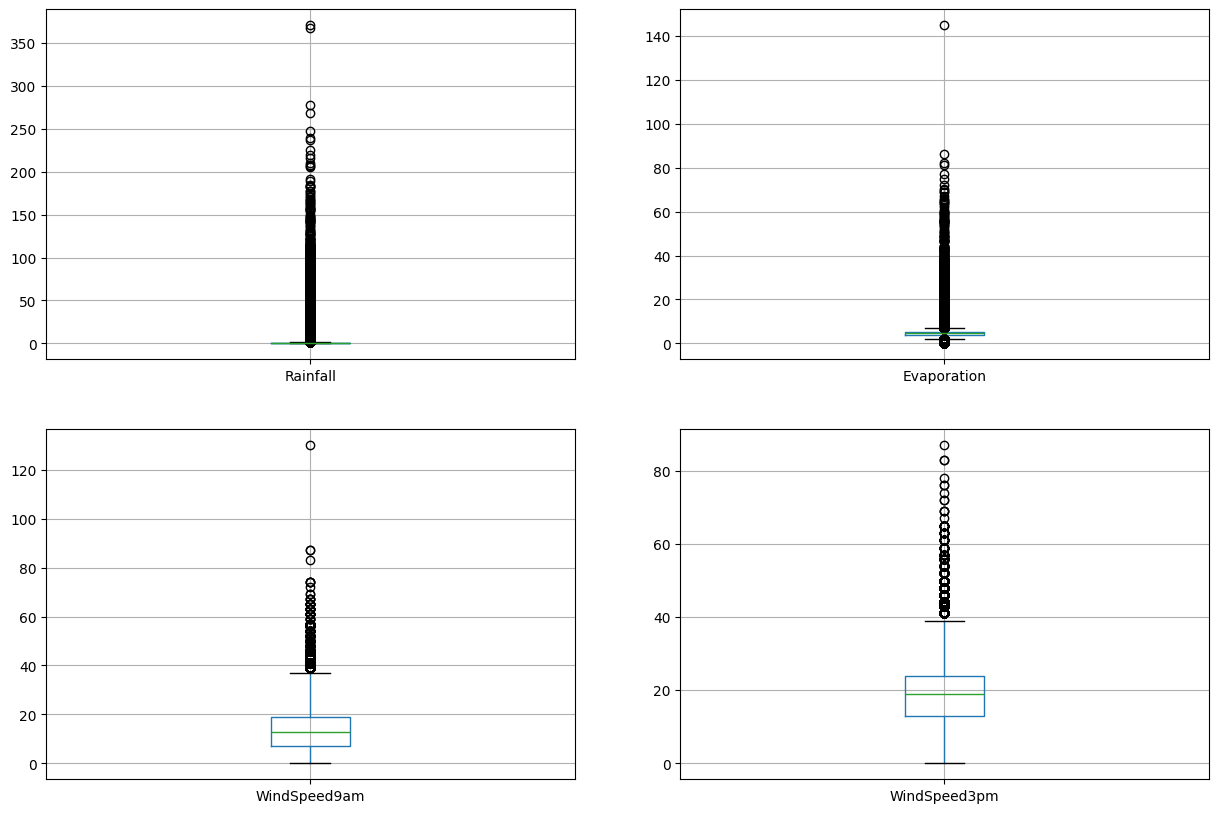

In [14]:
#Checking Outliers

plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
fig = df.boxplot(column='Rainfall')

plt.subplot(2, 2, 2)
fig = df.boxplot(column='Evaporation')

plt.subplot(2, 2, 3)
fig = df.boxplot(column='WindSpeed9am')

plt.subplot(2, 2, 4)
fig = df.boxplot(column='WindSpeed3pm')

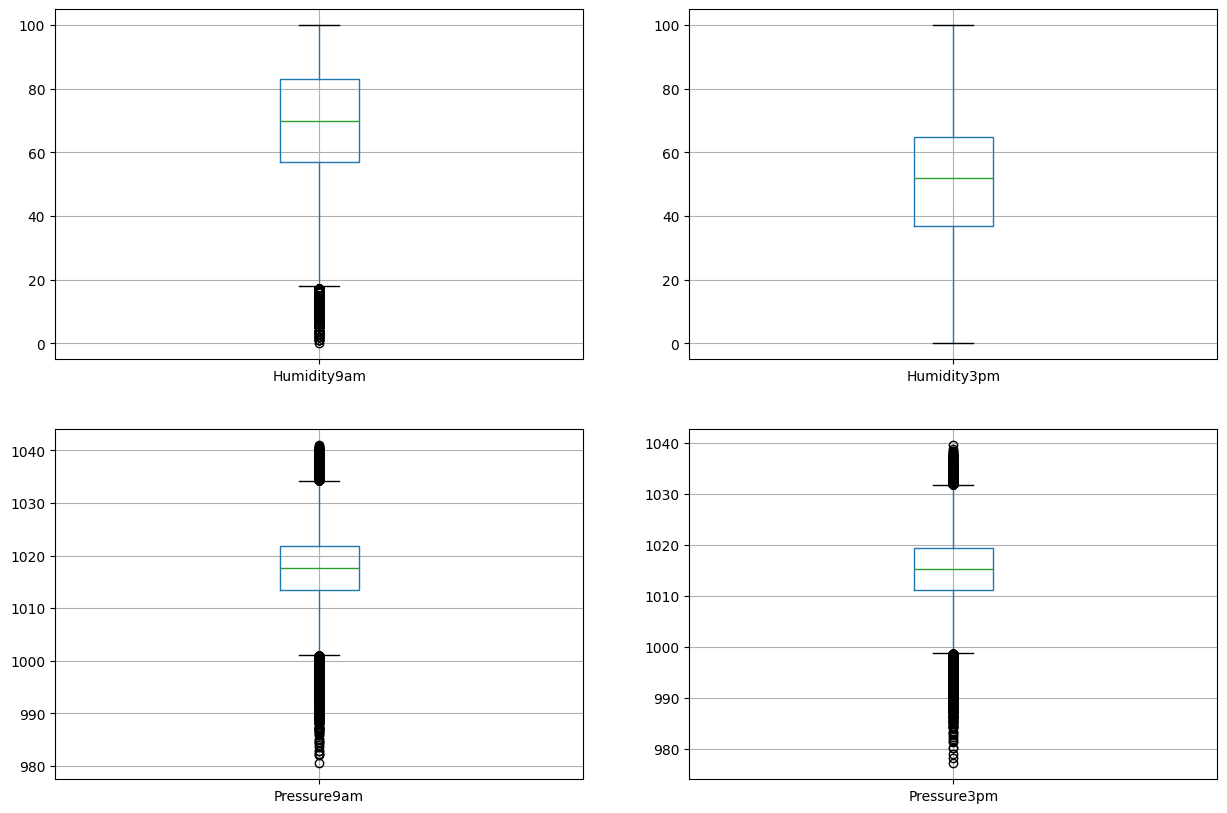

In [15]:
#Checking Outliers

plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
fig = df.boxplot(column='Humidity9am')

plt.subplot(2, 2, 2)
fig = df.boxplot(column='Humidity3pm')

plt.subplot(2, 2, 3)
fig = df.boxplot(column='Pressure9am')

plt.subplot(2, 2, 4)
fig = df.boxplot(column='Pressure3pm')

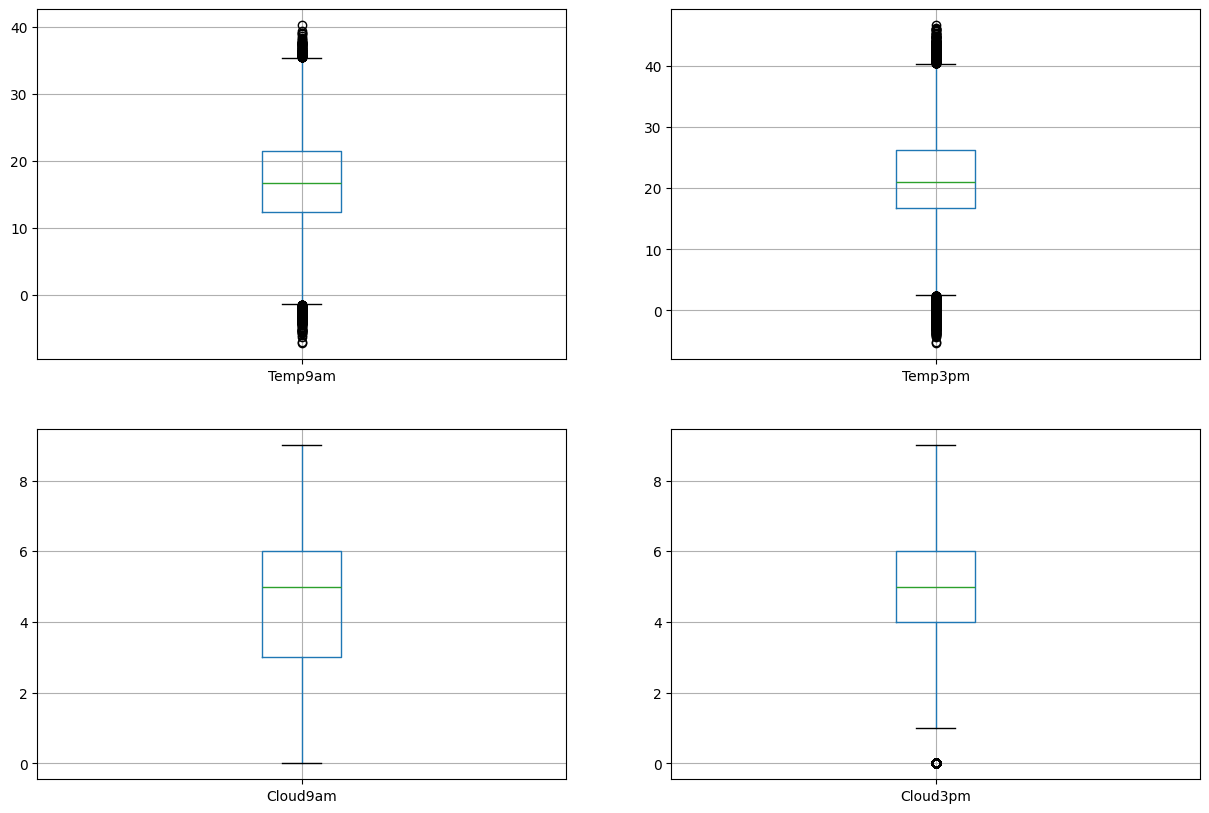

In [16]:
#Checking Outliers

plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
fig = df.boxplot(column='Temp9am')

plt.subplot(2, 2, 2)
fig = df.boxplot(column='Temp3pm')

plt.subplot(2, 2, 3)
fig = df.boxplot(column='Cloud9am')

plt.subplot(2, 2, 4)
fig = df.boxplot(column='Cloud3pm')

In [17]:
#Outliers Treatment

def remove_outlier (col):
  sorted(col)
  Q1,Q3=col.quantile([0.25,0.75])
  IQR=Q3-Q1
  lr=Q1-(1.5*IQR)
  ur=Q3+(1.5*IQR)
  return  lr,ur

In [18]:
#Outliers Treatment

lrRainfall,urRainfall=remove_outlier(df['Rainfall'])
lrEvaporation,urEvaporation=remove_outlier(df['Evaporation'])
lrWindSpeed9am,urWindSpeed9am=remove_outlier(df['WindSpeed9am'])
lrWindSpeed3pm,urWindSpeed3pm=remove_outlier(df['WindSpeed3pm'])
lrHumidity9am,urHumidity9am=remove_outlier(df['Humidity9am'])
lrHumidity3pm,urHumidity3pm=remove_outlier(df['Humidity3pm'])
lrPressure9am,urPressure9am=remove_outlier(df['Pressure9am'])
lrPressure3pm,urPressure3pm=remove_outlier(df['Pressure3pm'])
lrCloud9am,urCloud9am=remove_outlier(df['Cloud9am'])
lrCloud3pm,urCloud3pm=remove_outlier(df['Cloud3pm'])
lrTemp9am,urTemp9am=remove_outlier(df['Temp9am'])
lrTemp3pm,urTemp3pm=remove_outlier(df['Temp3pm'])

df['Rainfall']=np.where(df['Rainfall']<lrRainfall,lrRainfall,df['Rainfall'])
df['Rainfall']=np.where(df['Rainfall']>urRainfall,urRainfall,df['Rainfall'])

df['Evaporation']=np.where(df['Evaporation']<lrEvaporation,lrEvaporation,df['Evaporation'])
df['Evaporation']=np.where(df['Evaporation']>urEvaporation,urEvaporation,df['Evaporation'])

df['WindSpeed9am']=np.where(df['WindSpeed9am']<lrWindSpeed9am,lrWindSpeed9am,df['WindSpeed9am'])
df['WindSpeed9am']=np.where(df['WindSpeed9am']>urWindSpeed9am,urWindSpeed9am,df['WindSpeed9am'])

df['WindSpeed3pm']=np.where(df['WindSpeed3pm']<lrWindSpeed3pm,lrWindSpeed3pm,df['WindSpeed3pm'])
df['WindSpeed3pm']=np.where(df['WindSpeed3pm']>urWindSpeed3pm,urWindSpeed3pm,df['WindSpeed3pm'])

df['Humidity9am']=np.where(df['Humidity9am']<lrHumidity9am,lrHumidity9am,df['Humidity9am'])
df['Humidity9am']=np.where(df['Humidity9am']>urHumidity9am,urHumidity9am,df['Humidity9am'])

df['Pressure9am']=np.where(df['Pressure9am']<lrPressure9am,lrPressure9am,df['Pressure9am'])
df['Pressure9am']=np.where(df['Pressure9am']>urPressure9am,urPressure9am,df['Pressure9am'])

df['Pressure3pm']=np.where(df['Pressure3pm']<lrPressure3pm,lrPressure3pm,df['Pressure3pm'])
df['Pressure3pm']=np.where(df['Pressure3pm']>urPressure3pm,urPressure3pm,df['Pressure3pm'])

df['Cloud9am']=np.where(df['Cloud9am']<lrCloud9am,lrCloud9am,df['Cloud9am'])
df['Cloud9am']=np.where(df['Cloud9am']>urCloud9am,urCloud9am,df['Cloud9am'])

df['Cloud3pm']=np.where(df['Cloud3pm']<lrCloud3pm,lrCloud3pm,df['Cloud3pm'])
df['Cloud3pm']=np.where(df['Cloud3pm']>urCloud3pm,urCloud3pm,df['Cloud3pm'])

df['Temp9am']=np.where(df['Temp9am']<lrTemp9am,lrTemp9am,df['Temp9am'])
df['Temp9am']=np.where(df['Temp9am']>urTemp9am,urTemp9am,df['Temp9am'])

In [19]:
#Feature Engineering Of Date Variable

df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

df.drop('Date', axis=1, inplace = True)

In [20]:
#Shows Informatoin related to Data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 25 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       145460 non-null  object 
 1   MinTemp        145460 non-null  float64
 2   MaxTemp        145460 non-null  float64
 3   Rainfall       145460 non-null  float64
 4   Evaporation    145460 non-null  float64
 5   Sunshine       145460 non-null  float64
 6   WindGustDir    145460 non-null  object 
 7   WindGustSpeed  145460 non-null  float64
 8   WindDir9am     145460 non-null  object 
 9   WindDir3pm     145460 non-null  object 
 10  WindSpeed9am   145460 non-null  float64
 11  WindSpeed3pm   145460 non-null  float64
 12  Humidity9am    145460 non-null  float64
 13  Humidity3pm    145460 non-null  float64
 14  Pressure9am    145460 non-null  float64
 15  Pressure3pm    145460 non-null  float64
 16  Cloud9am       145460 non-null  float64
 17  Cloud3pm       145460 non-nul

In [21]:
#One-Hot Encoding

dummies = pd.get_dummies(df[['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']], drop_first=True)

In [22]:
#One-Hot Encoding

columns=['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']
df=pd.concat([df,dummies],axis=1)

df.drop(columns,axis=1,inplace=True)

In [23]:
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_Yes,RainTomorrow_Yes
0,13.4,22.9,0.6,4.8,8.4,44.0,20.0,24.0,71.0,22.0,...,False,False,False,False,False,False,True,False,False,False
1,7.4,25.1,0.0,4.8,8.4,44.0,4.0,22.0,44.0,25.0,...,False,False,False,False,False,False,False,True,False,False
2,12.9,25.7,0.0,4.8,8.4,46.0,19.0,26.0,38.0,30.0,...,False,False,False,False,False,False,False,True,False,False
3,9.2,28.0,0.0,4.8,8.4,24.0,11.0,9.0,45.0,16.0,...,False,False,False,False,False,False,False,False,False,False
4,17.5,32.3,1.0,4.8,8.4,41.0,7.0,20.0,82.0,33.0,...,False,False,False,False,False,False,False,False,False,False


In [24]:
#Spliting the Data into Training and Testing Dataset in ration of 80:20

from sklearn.model_selection import train_test_split

X = df.drop('RainTomorrow_Yes', axis=1)
y = df['RainTomorrow_Yes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
#Training the Model
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver='liblinear', random_state=0)

logreg.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [26]:
y_pred_test = logreg.predict(X_test)

y_pred_test

array([ True, False, False, ..., False, False, False])

In [27]:
#Probability of getting output as No Rain

logreg.predict_proba(X_test)[:,0]

array([0.37656951, 0.98424546, 0.71425225, ..., 0.8774356 , 0.69101982,
       0.81724328])

In [28]:
#Checking Accuracy Score

from sklearn.metrics import accuracy_score
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score: 0.8442


In [29]:
y_pred_train = logreg.predict(X_train)

y_pred_train

array([False, False, False, ..., False,  True, False])

In [30]:
#Print the Training Accuracy

print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.8454


In [31]:
#Print the scores on Training and Test Dataset

print('Training set score: {:.4f}'.format(logreg.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logreg.score(X_test, y_test)))

Training set score: 0.8454
Test set score: 0.8442


In [32]:
#Print the Confusion Matrix

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[21460  1212]
 [ 3321  3099]]

True Positives(TP) =  21460

True Negatives(TN) =  3099

False Positives(FP) =  1212

False Negatives(FN) =  3321


<Axes: >

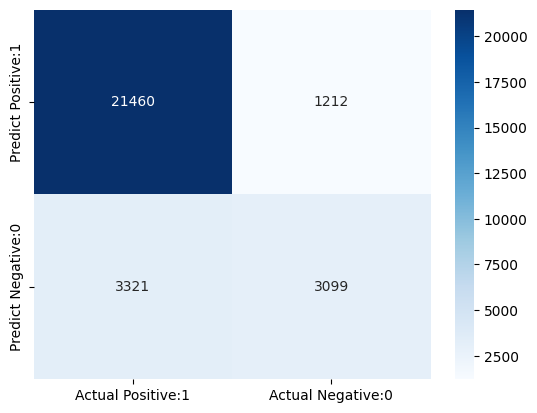

In [33]:
#Confusion-Matrix

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='Blues')

In [34]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

       False       0.87      0.95      0.90     22672
        True       0.72      0.48      0.58      6420

    accuracy                           0.84     29092
   macro avg       0.79      0.71      0.74     29092
weighted avg       0.83      0.84      0.83     29092



<Axes: >

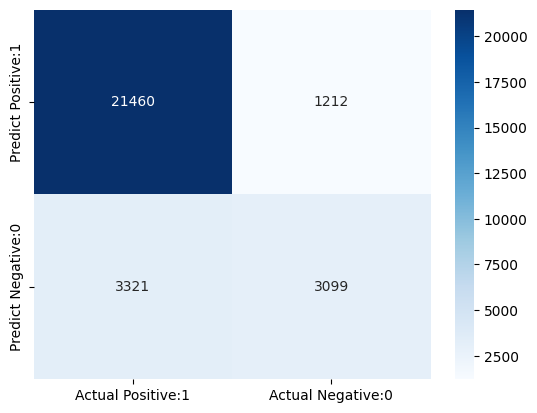

In [35]:
#Confusion-Matrix

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='Blues')

In [36]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

       False       0.87      0.95      0.90     22672
        True       0.72      0.48      0.58      6420

    accuracy                           0.84     29092
   macro avg       0.79      0.71      0.74     29092
weighted avg       0.83      0.84      0.83     29092

